In [18]:
import pandas as pd
import seaborn as Sns

In [19]:
t1=pd.read_csv("student_data.csv")
t1.rename(columns={'Roll Number' : 'rollno' , 'Blood Group' : 'Blood_group', 
'Mother Tongue' : 'Mother_Tongue'},inplace=True )
t2=pd.read_csv("Semester1cst.csv")
t1.head()

,rollno,Name,Department,Sex,Category,Blood_group,Board,Mother_Tongue,State
0,1401CE02,Stacee Whittingham,CE,M,OB,O-,INTERMEDIATE BOARD,GJ,HP
1,1401CE03,Tiffie Jeanon,CE,M,ST,B+,INTERMEDIATE BOARD (A.P),ML,HN
2,1401CE04,Natka Iacivelli,CE,M,GE,O-,BIEAP,HD,WB
3,1401CE05,Derrick Boland,CE,F,PD,A-,TELANGANA STATE BOARD,BH,TN
4,1401CE06,Sukey Veysey,CE,M,GE,B-,TELANGANA BOARD OF INTERMIDITE,BH,XY


In [20]:
t2.head()

,rollno,Branch,SPI1
0,1401CE01,CE,3.000000
1,1401CE02,CE,7.551020
2,1401CE03,CE,8.000000
3,1401CE04,CE,7.122449
4,1401CE05,CE,8.102041


In [21]:
df=pd.concat([t1,t2],axis='columns')
df = df.loc[:,~df.columns.duplicated()]
df.head()

,rollno,Name,Department,Sex,Category,Blood_group,Board,Mother_Tongue,State,Branch,SPI1
0,1401CE02,Stacee Whittingham,CE,M,OB,O-,INTERMEDIATE BOARD,GJ,HP,CE,3.000000
1,1401CE03,Tiffie Jeanon,CE,M,ST,B+,INTERMEDIATE BOARD (A.P),ML,HN,CE,7.551020
2,1401CE04,Natka Iacivelli,CE,M,GE,O-,BIEAP,HD,WB,CE,8.000000
3,1401CE05,Derrick Boland,CE,F,PD,A-,TELANGANA STATE BOARD,BH,TN,CE,7.122449
4,1401CE06,Sukey Veysey,CE,M,GE,B-,TELANGANA BOARD OF INTERMIDITE,BH,XY,CE,8.102041


In [22]:
d1=pd.get_dummies(df.Category)
d2=pd.get_dummies(df.Sex)
d3=pd.get_dummies(df.Department)
#d4=pd.get_dummies(df.Board)
#d5=pd.get_dummies(df.State)
#d6=pd.get_dummies(df.Mother_Tongue)
df=pd.concat([df,d1,d2,d3],axis='columns')
df = df.loc[:,~df.columns.duplicated()]
df = df.loc[df['SPI1'] > 5]
df=df.drop(['rollno', 'Name','Department','Sex','Category','Blood_group','Board','Mother_Tongue','State','Branch'], axis = 1)
y=df['SPI1']
df.head()
#Trying to avoid the dummy variable trap


,SPI1,GE,OB,PD,SC,ST,F,M,CE,CH,CS,EE,ME
1,7.551020,0,0,0,0,1,0,1,1,0,0,0,0
2,8.000000,1,0,0,0,0,0,1,1,0,0,0,0
3,7.122449,0,0,1,0,0,1,0,1,0,0,0,0
4,8.102041,1,0,0,0,0,0,1,1,0,0,0,0
5,6.734694,0,0,0,1,0,0,1,1,0,0,0,0


In [23]:
df.corr()

,SPI1,GE,OB,PD,SC,ST,F,M,CE,CH,CS,EE,ME
SPI1,1.000000,-0.066992,0.150524,0.053471,-0.079362,-0.040832,0.066288,-0.066288,0.097578,-0.107222,0.021922,0.045114,-0.061880
GE,-0.066992,1.000000,-0.219265,-0.211167,-0.258721,-0.274270,0.125112,-0.125112,0.112403,0.067106,-0.070707,-0.121692,0.072361
OB,0.150524,-0.219265,1.000000,-0.203726,-0.249605,-0.264606,-0.067254,0.067254,-0.061063,0.077984,-0.023740,-0.044217,0.057835
PD,0.053471,-0.211167,-0.203726,1.000000,-0.240387,-0.254834,0.016633,-0.016633,-0.100566,-0.100566,0.025497,-0.028658,0.141846
SC,-0.079362,-0.258721,-0.249605,-0.240387,1.000000,-0.312221,-0.060234,0.060234,0.154338,-0.013546,0.034805,-0.026694,-0.107833
ST,-0.040832,-0.274270,-0.264606,-0.254834,-0.312221,1.000000,-0.009197,0.009197,-0.110921,-0.029507,0.028793,0.198636,-0.132754
F,0.066288,0.125112,-0.067254,0.016633,-0.060234,-0.009197,1.000000,-1.000000,-0.051018,0.054556,-0.019742,-0.045535,0.064248
M,-0.066288,-0.125112,0.067254,-0.016633,0.060234,0.009197,-1.000000,1.000000,0.051018,-0.054556,0.019742,0.045535,-0.064248
CE,0.097578,0.112403,-0.061063,-0.100566,0.154338,-0.110921,-0.051018,0.051018,1.000000,-0.111765,-0.216930,-0.195058,-0.192334
CH,-0.107222,0.067106,0.077984,-0.100566,-0.013546,-0.029507,0.054556,-0.054556,-0.111765,1.000000,-0.216930,-0.195058,-0.192334


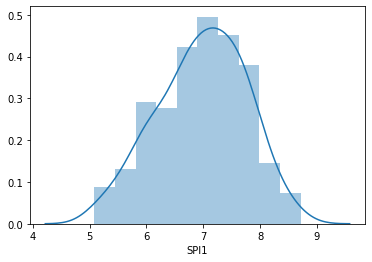

In [24]:
Sns.distplot(df.SPI1)

,SPI1,GE,OB,SC,ST,M,CE,CS,EE,ME
SPI1,1.000000,-0.066992,0.150524,-0.079362,-0.040832,-0.066288,0.097578,0.021922,0.045114,-0.061880
GE,-0.066992,1.000000,-0.219265,-0.258721,-0.274270,-0.125112,0.112403,-0.070707,-0.121692,0.072361
OB,0.150524,-0.219265,1.000000,-0.249605,-0.264606,0.067254,-0.061063,-0.023740,-0.044217,0.057835
SC,-0.079362,-0.258721,-0.249605,1.000000,-0.312221,0.060234,0.154338,0.034805,-0.026694,-0.107833
ST,-0.040832,-0.274270,-0.264606,-0.312221,1.000000,0.009197,-0.110921,0.028793,0.198636,-0.132754
M,-0.066288,-0.125112,0.067254,0.060234,0.009197,1.000000,0.051018,0.019742,0.045535,-0.064248
CE,0.097578,0.112403,-0.061063,0.154338,-0.110921,0.051018,1.000000,-0.216930,-0.195058,-0.192334
CS,0.021922,-0.070707,-0.023740,0.034805,0.028793,0.019742,-0.216930,1.000000,-0.378599,-0.373313
EE,0.045114,-0.121692,-0.044217,-0.026694,0.198636,0.045535,-0.195058,-0.378599,1.000000,-0.335673
ME,-0.061880,0.072361,0.057835,-0.107833,-0.132754,-0.064248,-0.192334,-0.373313,-0.335673,1.000000


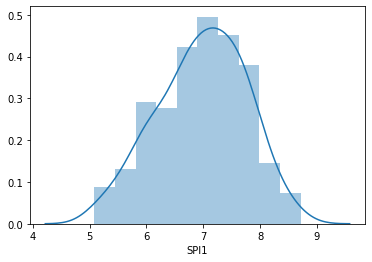

In [25]:
#Avoiding dummy trap
df=df.drop(['PD','F','CH'],axis=1)
df.head()
Sns.distplot(df.SPI1)
df.corr()

In [26]:
df.head(5)
df.drop(['SPI1'],axis=1)

,GE,OB,SC,ST,M,CE,CS,EE,ME
1,0,0,0,1,1,1,0,0,0
2,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0
5,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
194,0,1,0,0,1,0,0,1,0
195,0,0,0,1,0,0,0,1,0
196,0,0,1,0,1,0,0,0,1
197,0,1,0,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,y,test_size=0.2)
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X_train,Y_train)

1.0

In [29]:
model.score(X_test,Y_test)

1.0